In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas import read_excel
from pandas import read_csv
import math
import seaborn as sns
from pylab import rcParams

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline

#Reading The Patients Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# load the dataset

dataframe = read_csv('/content/patients.csv')
dataframe

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-02-17,NaN,999-65-3251,NaN,NaN,NaN,Damon455,Langosh790,NaN,...,Middleborough Massachusetts US,620 Lynch Tunnel Apt 0,Springfield,Massachusetts,Hampden County,1104.0,42.080389,-72.480431,9.039165e+03,7964.1255
1,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,2005-07-04,NaN,999-49-3323,S99941126,NaN,NaN,Thi53,Wunsch504,NaN,...,Danvers Massachusetts US,972 Tillman Branch Suite 48,Bellingham,Massachusetts,Norfolk County,NaN,42.035213,-71.482519,4.027234e+05,14064.1350
2,339144f8-50e1-633e-a013-f361391c4cff,1998-05-11,NaN,999-10-8743,S99996708,X75063318X,Mr.,Chi716,Greenfelder433,NaN,...,Athens Athens Prefecture GR,1060 Bernhard Crossroad Suite 15,Boston,Massachusetts,Suffolk County,2131.0,42.292557,-71.061160,5.719359e+05,787.5375
3,d488232e-bf14-4bed-08c0-a82f34b6a197,2003-01-28,NaN,999-56-6057,S99929424,NaN,Ms.,Phillis443,Walter473,NaN,...,Boston Massachusetts US,677 Ritchie Terrace,Hingham,Massachusetts,Plymouth County,2043.0,42.200491,-70.916076,5.825578e+05,104782.2070
4,217f95a3-4e10-bd5d-fb67-0cfb5e8ba075,1993-12-23,NaN,999-91-4320,S99991143,X44132498X,Mr.,Jerrold404,Herzog843,NaN,...,Boston Massachusetts US,276 Bernier Branch,Revere,Massachusetts,Suffolk County,NaN,42.381875,-70.999286,4.758269e+05,18067.0950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,409330fa-7ffd-dbfb-4eba-2349d58a6324,1979-02-28,NaN,999-68-5445,S99991649,X72884711X,Mr.,Coy949,Schaden604,NaN,...,Fitchburg Massachusetts US,434 Hickle Throughway Suite 15,Amherst,Massachusetts,Hampshire County,NaN,42.380084,-72.527376,1.050937e+06,346.5075
1159,cb328021-a854-dc94-e7ae-426580477308,1964-05-31,NaN,999-10-6445,S99986790,X86596484X,Mrs.,Sherry479,Barrows492,NaN,...,Boston Massachusetts US,976 Ortiz Orchard,Stoughton,Massachusetts,Norfolk County,NaN,42.081223,-71.126028,8.031471e+05,553335.4420
1160,41862157-5c14-f706-4a94-d2929be969e7,1967-07-12,NaN,999-63-2407,S99976335,X68999803X,Mr.,Vance413,Jakubowski832,NaN,...,Brockton Massachusetts US,534 Strosin Corner,Gardner,Massachusetts,Worcester County,1440.0,42.604215,-72.013243,1.028321e+06,28607.5050
1161,d53c57a5-4480-2481-32ee-b2844a991c9d,1948-07-28,NaN,999-37-8036,S99939062,X79037907X,Mr.,Cody889,Hilll811,NaN,...,Stoneham Massachusetts US,568 Ryan Stravenue,Mashpee,Massachusetts,Barnstable County,NaN,41.577704,-70.507460,2.638801e+05,155042.0520


In [3]:
dataframe=dataframe.rename(columns={"Id": "PATIENTID"})

In [4]:
dataframe.dtypes

,0
PATIENTID,object
BIRTHDATE,object
DEATHDATE,object
SSN,object
DRIVERS,object
PASSPORT,object
PREFIX,object
FIRST,object
LAST,object
SUFFIX,object


In [5]:
# load the dataset
dataframe1 = read_csv('/content/conditions.csv')
dataframe1

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2013-06-24,2013-07-02,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,0b2794bd-ec2b-d34f-0610-2523b3b7fcf0,10509002,Acute bronchitis (disorder)
1,2016-02-27,2016-03-14,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,a6d818dd-0983-fd1c-eefa-3d2295532c45,283371005,Laceration of forearm
2,2016-08-11,2016-08-22,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,36d2e781-4655-0a11-1f70-c69856e02019,444814009,Viral sinusitis (disorder)
3,2016-11-27,2016-12-17,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,c8eaaf41-958b-31ab-7de5-568cee8751f3,444814009,Viral sinusitis (disorder)
4,2017-02-22,2017-06-02,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,6474f606-5a1b-48c0-bbbf-ad6dcbc24d4e,16114001,Fracture of ankle
...,...,...,...,...,...,...
38089,2020-01-10,2021-01-15,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,090096d3-9404-3cb5-d1eb-583bf4c39180,160903007,Full-time employment (finding)
38090,2020-12-27,2021-01-03,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,db101ad8-66e2-9feb-e0cf-b2618f873c3a,38822007,Cystitis
38091,2021-01-15,NaN,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,1516d2e6-4846-5f1e-fe27-c1ebb9a39f72,160904001,Part-time employment (finding)
38092,2021-01-15,NaN,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,1516d2e6-4846-5f1e-fe27-c1ebb9a39f72,73595000,Stress (finding)


In [6]:
dataframe1=dataframe1.rename(columns={"PATIENT": "PATIENTID"})

In [7]:
import plotly.express as px
import pandas as pd

fig = px.scatter_geo(dataframe,lat='LAT',lon='LON')
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

In [8]:

import plotly.express as px
import pandas as pd


color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(dataframe,
                        lat="LAT",
                        lon="LON",
                        hover_name="ADDRESS",
                        hover_data=["ADDRESS", "CITY"],
                        #color='Red',
                        color_continuous_scale=color_scale,
                        size="HEALTHCARE_EXPENSES",
                        zoom=8,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [9]:
dataframe1.dtypes

,0
START,object
STOP,object
PATIENTID,object
ENCOUNTER,object
CODE,int64
DESCRIPTION,object


#Data Visualization

<Axes: xlabel='CITY', ylabel='count'>

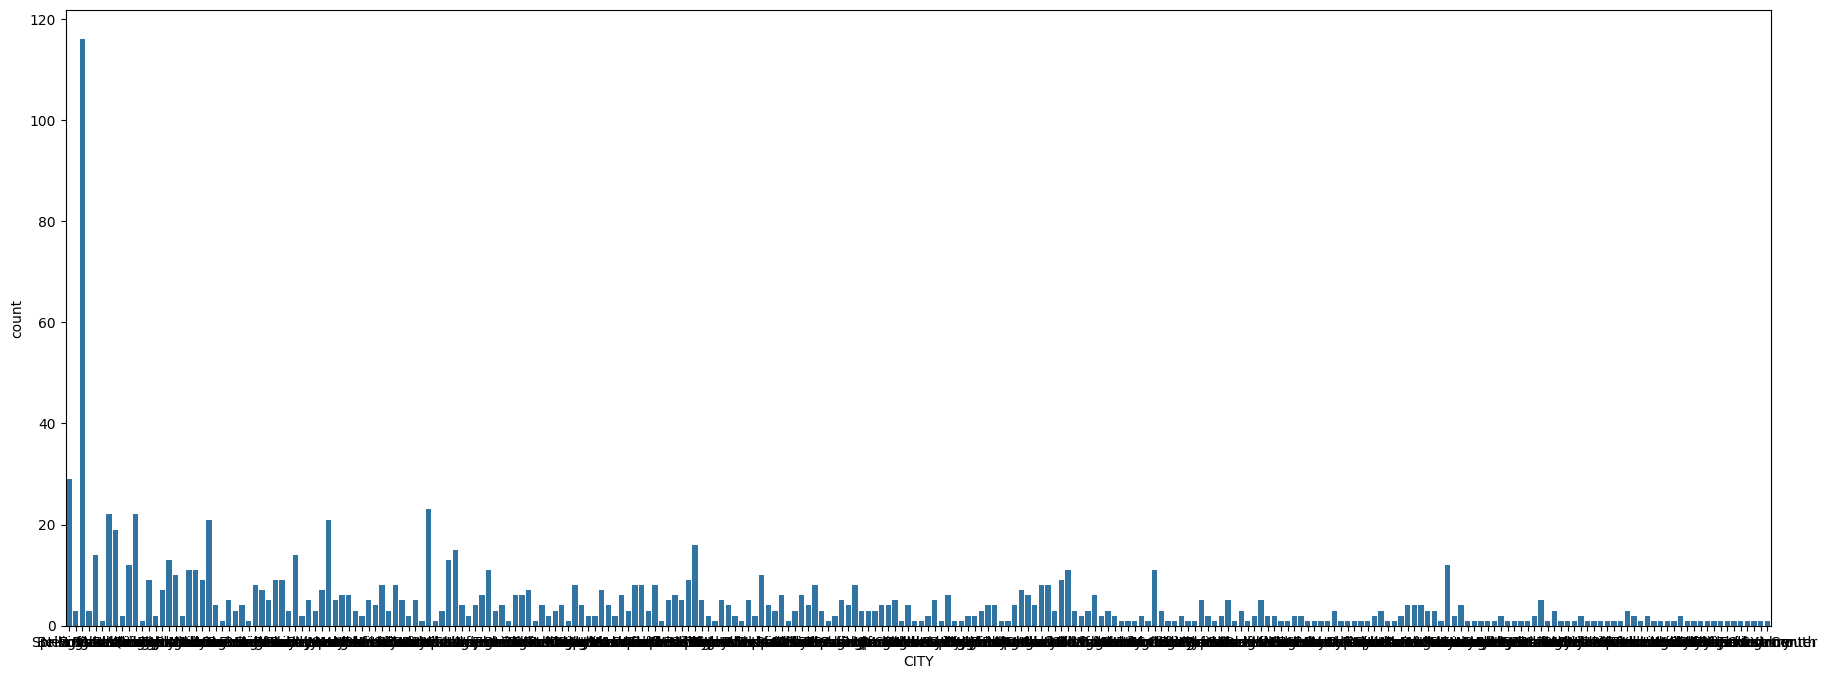

In [10]:
plt.figure(figsize = (22,8))
sns.countplot(x='CITY',data = dataframe)

<Axes: xlabel='DESCRIPTION', ylabel='count'>

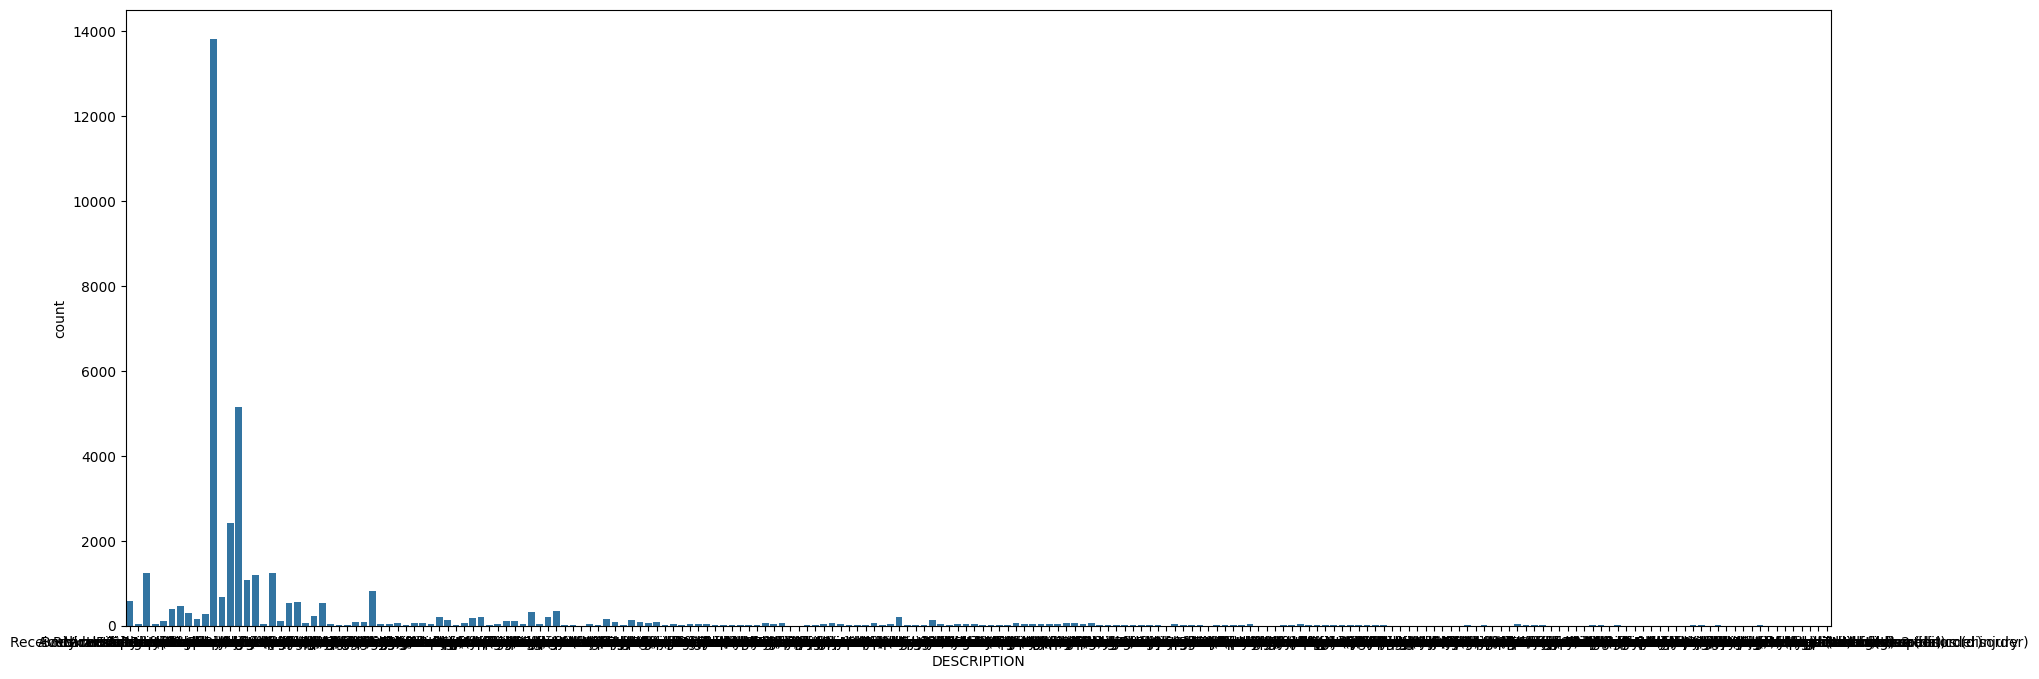

In [11]:
plt.figure(figsize = (22,8))

sns.countplot(x='DESCRIPTION',data = dataframe1) #looking at number of Movies and TV shows

#Clean The Data by Dropping Unwanted CLoumns / Rows

Data cleaning
Drop irrelevant columns

In [12]:
dataframe = dataframe.drop(['DRIVERS', 'SUFFIX', 'MAIDEN', 'PREFIX','PASSPORT'], axis=1)

In [13]:
# Remove duplicate records
dataframe = dataframe.drop_duplicates()

#Merge datasets based on common columns (Integrate Records)

In [14]:
df = pd.merge(dataframe, dataframe1, on='PATIENTID', how='inner')

In [15]:
df

,PATIENTID,BIRTHDATE,DEATHDATE,SSN,FIRST,LAST,MARITAL,RACE,ETHNICITY,GENDER,...,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,START,STOP,ENCOUNTER,CODE,DESCRIPTION
0,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,2005-07-04,NaN,999-49-3323,Thi53,Wunsch504,NaN,white,nonhispanic,F,...,NaN,42.035213,-71.482519,402723.415,14064.135,2013-06-24,2013-07-02,0b2794bd-ec2b-d34f-0610-2523b3b7fcf0,10509002,Acute bronchitis (disorder)
1,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,2005-07-04,NaN,999-49-3323,Thi53,Wunsch504,NaN,white,nonhispanic,F,...,NaN,42.035213,-71.482519,402723.415,14064.135,2016-02-27,2016-03-14,a6d818dd-0983-fd1c-eefa-3d2295532c45,283371005,Laceration of forearm
2,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,2005-07-04,NaN,999-49-3323,Thi53,Wunsch504,NaN,white,nonhispanic,F,...,NaN,42.035213,-71.482519,402723.415,14064.135,2016-08-11,2016-08-22,36d2e781-4655-0a11-1f70-c69856e02019,444814009,Viral sinusitis (disorder)
3,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,2005-07-04,NaN,999-49-3323,Thi53,Wunsch504,NaN,white,nonhispanic,F,...,NaN,42.035213,-71.482519,402723.415,14064.135,2016-11-27,2016-12-17,c8eaaf41-958b-31ab-7de5-568cee8751f3,444814009,Viral sinusitis (disorder)
4,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,2005-07-04,NaN,999-49-3323,Thi53,Wunsch504,NaN,white,nonhispanic,F,...,NaN,42.035213,-71.482519,402723.415,14064.135,2017-02-22,2017-06-02,6474f606-5a1b-48c0-bbbf-ad6dcbc24d4e,16114001,Fracture of ankle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38089,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,1958-11-07,NaN,999-17-1411,Haywood675,Schroeder447,M,asian,nonhispanic,M,...,NaN,42.466700,-70.903323,1548720.970,217.110,2020-01-10,2021-01-15,090096d3-9404-3cb5-d1eb-583bf4c39180,160903007,Full-time employment (finding)
38090,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,1958-11-07,NaN,999-17-1411,Haywood675,Schroeder447,M,asian,nonhispanic,M,...,NaN,42.466700,-70.903323,1548720.970,217.110,2020-12-27,2021-01-03,db101ad8-66e2-9feb-e0cf-b2618f873c3a,38822007,Cystitis
38091,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,1958-11-07,NaN,999-17-1411,Haywood675,Schroeder447,M,asian,nonhispanic,M,...,NaN,42.466700,-70.903323,1548720.970,217.110,2021-01-15,NaN,1516d2e6-4846-5f1e-fe27-c1ebb9a39f72,160904001,Part-time employment (finding)
38092,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,1958-11-07,NaN,999-17-1411,Haywood675,Schroeder447,M,asian,nonhispanic,M,...,NaN,42.466700,-70.903323,1548720.970,217.110,2021-01-15,NaN,1516d2e6-4846-5f1e-fe27-c1ebb9a39f72,73595000,Stress (finding)


In [16]:
df.dtypes

,0
PATIENTID,object
BIRTHDATE,object
DEATHDATE,object
SSN,object
FIRST,object
LAST,object
MARITAL,object
RACE,object
ETHNICITY,object
GENDER,object


#Folium

In [17]:
pip install folium

In [18]:
# for multiple points
from shapely.geometry import Point
import folium
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import folium # plotting library
from folium import plugins

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [19]:
df.head()

,PATIENTID,BIRTHDATE,DEATHDATE,SSN,FIRST,LAST,MARITAL,RACE,ETHNICITY,GENDER,...,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,START,STOP,ENCOUNTER,CODE,DESCRIPTION
0,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,2005-07-04,NaN,999-49-3323,Thi53,Wunsch504,NaN,white,nonhispanic,F,...,NaN,42.035213,-71.482519,402723.415,14064.135,2013-06-24,2013-07-02,0b2794bd-ec2b-d34f-0610-2523b3b7fcf0,10509002,Acute bronchitis (disorder)
1,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,2005-07-04,NaN,999-49-3323,Thi53,Wunsch504,NaN,white,nonhispanic,F,...,NaN,42.035213,-71.482519,402723.415,14064.135,2016-02-27,2016-03-14,a6d818dd-0983-fd1c-eefa-3d2295532c45,283371005,Laceration of forearm
2,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,2005-07-04,NaN,999-49-3323,Thi53,Wunsch504,NaN,white,nonhispanic,F,...,NaN,42.035213,-71.482519,402723.415,14064.135,2016-08-11,2016-08-22,36d2e781-4655-0a11-1f70-c69856e02019,444814009,Viral sinusitis (disorder)
3,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,2005-07-04,NaN,999-49-3323,Thi53,Wunsch504,NaN,white,nonhispanic,F,...,NaN,42.035213,-71.482519,402723.415,14064.135,2016-11-27,2016-12-17,c8eaaf41-958b-31ab-7de5-568cee8751f3,444814009,Viral sinusitis (disorder)
4,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,2005-07-04,NaN,999-49-3323,Thi53,Wunsch504,NaN,white,nonhispanic,F,...,NaN,42.035213,-71.482519,402723.415,14064.135,2017-02-22,2017-06-02,6474f606-5a1b-48c0-bbbf-ad6dcbc24d4e,16114001,Fracture of ankle


In [20]:
df['DESCRIPTION'].value_counts()

,count
DESCRIPTION,
Full-time employment (finding),13805
Stress (finding),5137
Part-time employment (finding),2426
Social isolation (finding),1243
Viral sinusitis (disorder),1233
...,...
At risk for suicide (finding),1
Dislocation of hip joint (disorder),1
Injury of kidney (disorder),1


In [21]:
df['CITY'].value_counts()

,count
CITY,
Boston,3624
Quincy,1264
Springfield,1219
Fall River,1093
Conway,1031
...,...
Whately,2
Yarmouth Port,2
Uxbridge,1


##Data prep for k-Means clustering

In [22]:
dfViz = df[(df['CITY'] != 'NaN') & (df['DESCRIPTION'] != 'NaN')]
dfViz.head()

,PATIENTID,BIRTHDATE,DEATHDATE,SSN,FIRST,LAST,MARITAL,RACE,ETHNICITY,GENDER,...,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,START,STOP,ENCOUNTER,CODE,DESCRIPTION
0,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,2005-07-04,NaN,999-49-3323,Thi53,Wunsch504,NaN,white,nonhispanic,F,...,NaN,42.035213,-71.482519,402723.415,14064.135,2013-06-24,2013-07-02,0b2794bd-ec2b-d34f-0610-2523b3b7fcf0,10509002,Acute bronchitis (disorder)
1,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,2005-07-04,NaN,999-49-3323,Thi53,Wunsch504,NaN,white,nonhispanic,F,...,NaN,42.035213,-71.482519,402723.415,14064.135,2016-02-27,2016-03-14,a6d818dd-0983-fd1c-eefa-3d2295532c45,283371005,Laceration of forearm
2,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,2005-07-04,NaN,999-49-3323,Thi53,Wunsch504,NaN,white,nonhispanic,F,...,NaN,42.035213,-71.482519,402723.415,14064.135,2016-08-11,2016-08-22,36d2e781-4655-0a11-1f70-c69856e02019,444814009,Viral sinusitis (disorder)
3,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,2005-07-04,NaN,999-49-3323,Thi53,Wunsch504,NaN,white,nonhispanic,F,...,NaN,42.035213,-71.482519,402723.415,14064.135,2016-11-27,2016-12-17,c8eaaf41-958b-31ab-7de5-568cee8751f3,444814009,Viral sinusitis (disorder)
4,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,2005-07-04,NaN,999-49-3323,Thi53,Wunsch504,NaN,white,nonhispanic,F,...,NaN,42.035213,-71.482519,402723.415,14064.135,2017-02-22,2017-06-02,6474f606-5a1b-48c0-bbbf-ad6dcbc24d4e,16114001,Fracture of ankle


In [23]:
df_types = dfViz[['CITY','DESCRIPTION']]

df_types.head()

,CITY,DESCRIPTION
0,Bellingham,Acute bronchitis (disorder)
1,Bellingham,Laceration of forearm
2,Bellingham,Viral sinusitis (disorder)
3,Bellingham,Viral sinusitis (disorder)
4,Bellingham,Fracture of ankle


Here, we are going to group the occurences for each Description!

In [24]:
types = pd.get_dummies(df_types['DESCRIPTION'])

types['CITY'] = df_types['CITY']

types = types.groupby('CITY').sum().reset_index()

types.head()

,CITY,Acquired coagulation disorder (disorder),Acute Cholecystitis,Acute allergic reaction,Acute bacterial sinusitis (disorder),Acute bronchitis (disorder),Acute deep venous thrombosis (disorder),Acute pulmonary embolism (disorder),Acute respiratory distress syndrome (disorder),Acute respiratory failure (disorder),...,Transformed migraine (disorder),Transport problems (finding),Tubal pregnancy,Unemployed (finding),Unhealthy alcohol drinking behavior (finding),Victim of intimate partner abuse (finding),Viral sinusitis (disorder),Vomiting symptom (finding),Wheezing (finding),Whiplash injury to neck
0,Abington,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Acton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Acushnet,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,Adams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Agawam,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,6,0,0,1


###k-Means Clustering


In [25]:
codes = types[['CITY']]
types.drop('CITY', axis=1, inplace=True)

In order to identify the optimal number of clusters, we need to use the Elbow Method! When the slope of the tangent line starts to be almost horizontal, that is the optimal number of cluster!¶


In [26]:
distortions = []

K = range(1,20)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 500)
    kmean.fit(types)
    distortions.append(kmean.inertia_)

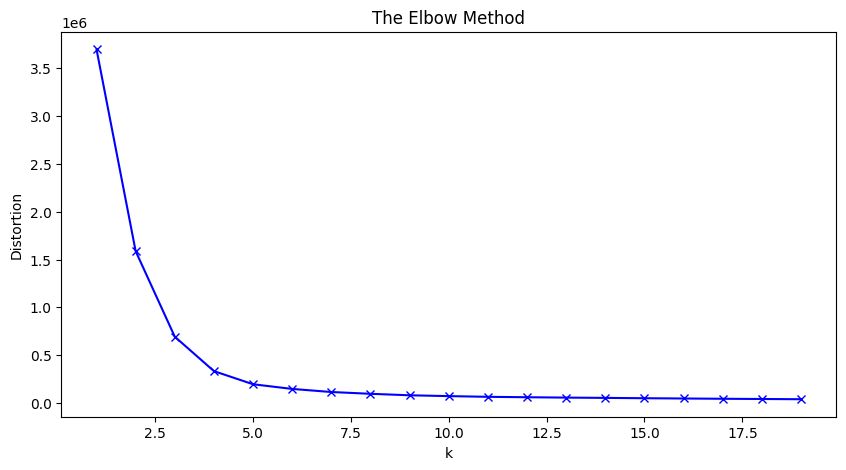

In [27]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

The elbow method seems to suggest 4 or 7 clusters!


In [28]:
# run k-means clustering
kmeans = KMeans(n_clusters=7, random_state=0).fit(types)

codes['cluster'] = kmeans.labels_
codes.head()

<ipython-input-28-f5b1d7332099>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CITY,cluster
0,Abington,0
1,Acton,0
2,Acushnet,0
3,Adams,0
4,Agawam,0


I am used to apply some dimensionality reduction techniques in order to visualise how our clusters are related in the original high dimensional space! Moreover, we are able to see if the features of our data are linear related among them.¶


In [29]:
pca = PCA().fit(types)
pca_types = pca.transform(types)
print("Variance explained by each component (%): ")
for i in range(len(pca.explained_variance_ratio_)):
      print("\n",i+1,"º:", pca.explained_variance_ratio_[i]*100)
print("Total sum (%): ",sum(pca.explained_variance_ratio_)*100)
print("Explained variance of the first two components (%): ",sum(pca.explained_variance_ratio_[0:1])*100)

Variance explained by each component (%): 

 1 º: 98.10607104356927

 2 º: 0.7442492599121071

 3 º: 0.45969930981815876

 4 º: 0.22033366996849807

 5 º: 0.08078741099824276

 6 º: 0.05088069043285133

 7 º: 0.04364081980513934

 8 º: 0.030913141093107093

 9 º: 0.026311900910134

 10 º: 0.021865828836751516

 11 º: 0.019720302706747496

 12 º: 0.016717816046407114

 13 º: 0.01482092305979805

 14 º: 0.012274132655335258

 15 º: 0.011133543610668829

 16 º: 0.009719840376348706

 17 º: 0.008663050582784765

 18 º: 0.00841094888489961

 19 º: 0.007052881049676173

 20 º: 0.006893386491430934

 21 º: 0.00585038163828438

 22 º: 0.005710942767264621

 23 º: 0.004973141882766045

 24 º: 0.0046840823088232075

 25 º: 0.004349166645815053

 26 º: 0.003869139158674521

 27 º: 0.003624863193106109

 28 º: 0.0033252196240945416

 29 º: 0.0030382097554366005

 30 º: 0.0027523879535180807

 31 º: 0.0027047440112184236

 32 º: 0.002586656586762984

 33 º: 0.0024750880359148864

 34 º: 0.002258734

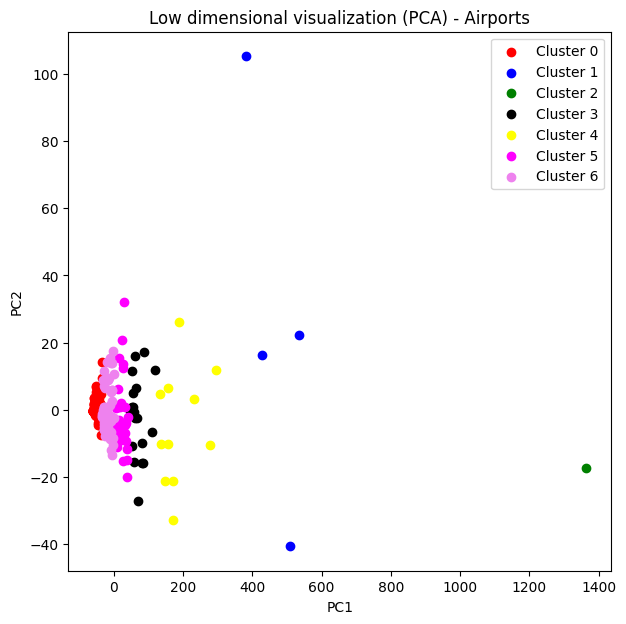

In [30]:
c0 = []
c1 = []
c2 = []
c3 = []
c4 = []
c5 = []
c6 = []
for i in range(len(pca_types)):
    if kmeans.labels_[i] == 0:
        c0.append(pca_types[i])
    if kmeans.labels_[i] == 1:
        c1.append(pca_types[i])
    if kmeans.labels_[i] == 2:
        c2.append(pca_types[i])
    if kmeans.labels_[i] == 3:
        c3.append(pca_types[i])
    if kmeans.labels_[i] == 4:
        c4.append(pca_types[i])
    if kmeans.labels_[i] == 5:
        c5.append(pca_types[i])
    if kmeans.labels_[i] == 6:
        c6.append(pca_types[i])
c0 = np.array(c0)
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)
c4 = np.array(c4)
c5 = np.array(c5)
c6 = np.array(c6)

plt.figure(figsize=(7,7))
plt.scatter(c0[:,0], c0[:,1], c='red', label='Cluster 0')
plt.scatter(c1[:,0], c1[:,1], c='blue', label='Cluster 1')
plt.scatter(c2[:,0], c2[:,1], c='green', label='Cluster 2')
plt.scatter(c3[:,0], c3[:,1], c='black', label='Cluster 3')

plt.scatter(c4[:,0], c4[:,1], c='yellow', label='Cluster 4')
plt.scatter(c5[:,0], c5[:,1], c='magenta', label='Cluster 5')
plt.scatter(c6[:,0], c6[:,1], c='violet', label='Cluster 6')


plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Low dimensional visualization (PCA) - Airports');

We see that 7 clusters seems to be reasonable to identify similar samples within our data!
Let's take a look in the particularity of each cluster using seaborn library!

In [31]:
types['cluster']  = kmeans.labels_

types.head()

,Acquired coagulation disorder (disorder),Acute Cholecystitis,Acute allergic reaction,Acute bacterial sinusitis (disorder),Acute bronchitis (disorder),Acute deep venous thrombosis (disorder),Acute pulmonary embolism (disorder),Acute respiratory distress syndrome (disorder),Acute respiratory failure (disorder),Acute viral pharyngitis (disorder),...,Transport problems (finding),Tubal pregnancy,Unemployed (finding),Unhealthy alcohol drinking behavior (finding),Victim of intimate partner abuse (finding),Viral sinusitis (disorder),Vomiting symptom (finding),Wheezing (finding),Whiplash injury to neck,cluster
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,7,...,0,1,0,0,1,6,0,0,1,0


In [32]:
types.groupby('cluster').mean()

,Acquired coagulation disorder (disorder),Acute Cholecystitis,Acute allergic reaction,Acute bacterial sinusitis (disorder),Acute bronchitis (disorder),Acute deep venous thrombosis (disorder),Acute pulmonary embolism (disorder),Acute respiratory distress syndrome (disorder),Acute respiratory failure (disorder),Acute viral pharyngitis (disorder),...,Transformed migraine (disorder),Transport problems (finding),Tubal pregnancy,Unemployed (finding),Unhealthy alcohol drinking behavior (finding),Victim of intimate partner abuse (finding),Viral sinusitis (disorder),Vomiting symptom (finding),Wheezing (finding),Whiplash injury to neck
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.00000,0.000000,0.000000,0.095238,0.841270,0.000000,0.000000,0.000000,0.000000,1.055556,...,0.015873,0.126984,0.031746,0.103175,0.214286,0.674603,1.738095,0.000000,0.031746,0.087302
1,0.00000,0.000000,0.250000,1.500000,9.000000,0.000000,0.000000,0.000000,0.000000,12.000000,...,0.250000,2.000000,0.500000,2.000000,2.500000,26.250000,19.000000,0.000000,0.000000,0.500000
2,0.00000,0.000000,1.000000,9.000000,57.000000,1.000000,2.000000,0.000000,1.000000,49.000000,...,1.000000,30.000000,3.000000,13.000000,17.000000,77.000000,135.000000,0.000000,1.000000,3.000000
3,0.00000,0.047619,0.047619,0.428571,3.523810,0.000000,0.000000,0.000000,0.047619,4.761905,...,0.047619,0.714286,0.190476,0.333333,1.142857,5.333333,8.857143,0.047619,0.142857,0.238095
4,0.00000,0.181818,0.090909,0.818182,6.909091,0.090909,0.181818,0.000000,0.000000,9.272727,...,0.090909,0.636364,0.000000,1.000000,2.000000,13.363636,16.181818,0.000000,0.363636,0.636364
5,0.03125,0.031250,0.125000,0.562500,3.531250,0.031250,0.000000,0.062500,0.062500,3.718750,...,0.125000,0.500000,0.156250,0.406250,1.031250,4.937500,6.687500,0.000000,0.062500,0.250000
6,0.00000,0.000000,0.000000,0.186441,1.847458,0.050847,0.016949,0.033898,0.033898,2.152542,...,0.000000,0.254237,0.101695,0.169492,0.627119,2.288136,3.813559,0.033898,0.050847,0.169492


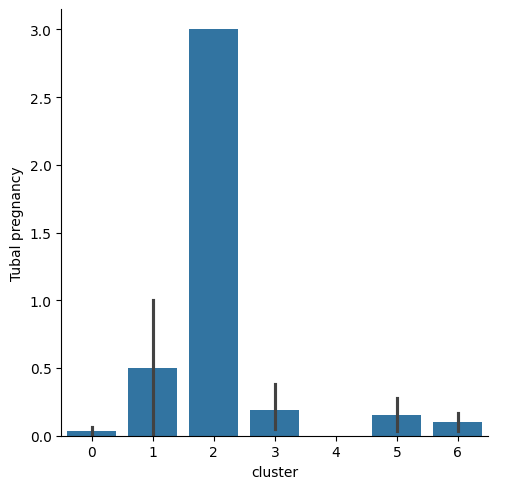

In [33]:
sns.catplot(x='cluster', y='Tubal pregnancy', data=types, kind='bar');


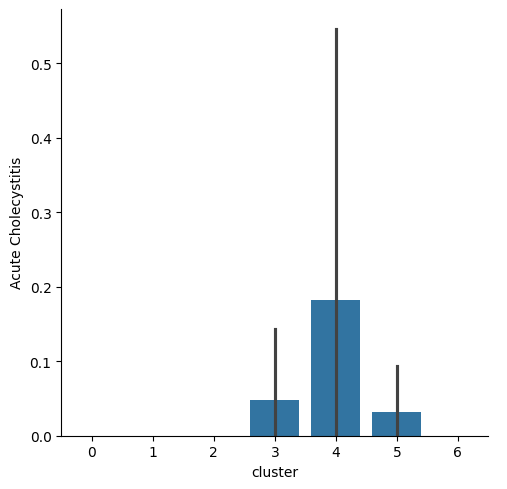

In [34]:
sns.catplot(x='cluster', y='Acute Cholecystitis', data=types, kind='bar');

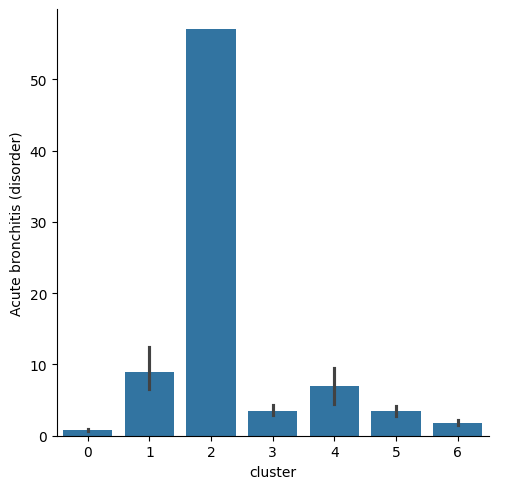

In [35]:
sns.catplot(x='cluster', y='Acute bronchitis (disorder)', data=types, kind='bar');

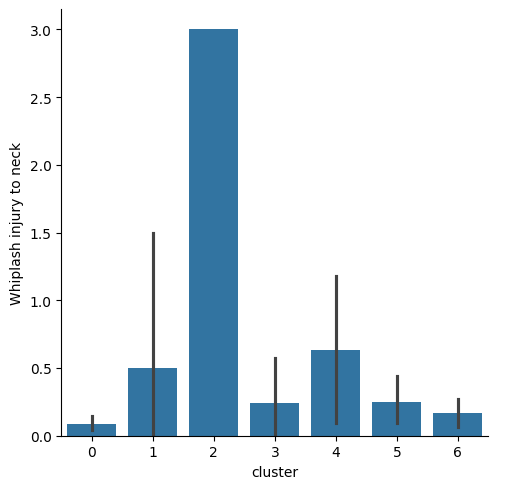

In [36]:
sns.catplot(x='cluster', y='Whiplash injury to neck', data=types, kind='bar');

###Folium Maps Visualisation by Number of Occurences and Clustering


Firstly, we need to create a map of USA
We are going to plot two maps: the first one will display Cities by their number of medical Conditions that occured in that city! The size of each mark (of each city) will vary accordingly to these numbers. The second map will show us the clusters that we had acquired through k-Means!

In [37]:
latitude = 38.500000
longitude = -95.665

map_USA = folium.Map(location=[latitude, longitude], zoom_start=4)

map_USA

In [38]:
df.dtypes

,0
PATIENTID,object
BIRTHDATE,object
DEATHDATE,object
SSN,object
FIRST,object
LAST,object
MARITAL,object
RACE,object
ETHNICITY,object
GENDER,object


In [39]:
city = df[['CITY', 'LAT','LON','STATE','COUNTY']]

city.head()

,CITY,LAT,LON,STATE,COUNTY
0,Bellingham,42.035213,-71.482519,Massachusetts,Norfolk County
1,Bellingham,42.035213,-71.482519,Massachusetts,Norfolk County
2,Bellingham,42.035213,-71.482519,Massachusetts,Norfolk County
3,Bellingham,42.035213,-71.482519,Massachusetts,Norfolk County
4,Bellingham,42.035213,-71.482519,Massachusetts,Norfolk County


In [40]:
number_of_occurences = pd.DataFrame(city['CITY'].value_counts())
number_of_occurences.reset_index(inplace=True)
number_of_occurences.columns = ['CITY', 'Count']
number_of_occurences.head()

,CITY,Count
0,Boston,3624
1,Quincy,1264
2,Springfield,1219
3,Fall River,1093
4,Conway,1031


In [41]:
number_of_occurences = number_of_occurences.merge(city.drop_duplicates())

number_of_occurences = number_of_occurences.merge(codes)

number_of_occurences.head()

,CITY,Count,LAT,LON,STATE,COUNTY,cluster
0,Boston,3624,42.292557,-71.061160,Massachusetts,Suffolk County,2
1,Boston,3624,42.366924,-71.064831,Massachusetts,Suffolk County,2
2,Boston,3624,42.290594,-71.092167,Massachusetts,Suffolk County,2
3,Boston,3624,42.319000,-71.060098,Massachusetts,Suffolk County,2
4,Boston,3624,42.333188,-71.020921,Massachusetts,Suffolk County,2


In [42]:
occurences = folium.map.FeatureGroup()
n_mean = number_of_occurences['Count'].mean()

for lat, lng, number, city, state in zip(number_of_occurences['LAT'],
                                         number_of_occurences['LON'],
                                         number_of_occurences['Count'],
                                         number_of_occurences['STATE'],
                                         number_of_occurences['COUNTY'],):
    occurences.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=number/n_mean*5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            tooltip = str(number)+','+str(city) +','+ str(state)
        )
    )

map_USA.add_child(occurences)

We can see that the Cities that had registered the greatest number of occurences  
 weather events! However, the state of Colorado seems to be a exception to that :)
Finally, let's see our clusters!

In [43]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(7)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, cluster, city, state in zip(number_of_occurences['LAT'], number_of_occurences['LON'],
                                            number_of_occurences['cluster'],
                                         number_of_occurences['STATE'],
                                         number_of_occurences['COUNTY']):
    #label = folium.Popup(str(city)+ ','+str(state) + '- Cluster ' + str(cluster), parse_html=True)
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        tooltip = str(city)+ ','+str(state) + '- Cluster ' + str(cluster),
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)

map_clusters

Reference - https://www.kaggle.com/code/lucaspcarlini/clustering-and-visualisation-using-folium-maps/notebook